In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', None)

# Investigate certificates and minutes dataset 

In [2]:
df = pd.read_csv(r"D:\DONE PROJECTS\datascientist_project\certificates_and_minutes.csv")
df.head()

,student_id,certificates_issued,minutes_watched
0,6,1,148.12
1,182,7,14132.07
2,801,13,78858.00
3,841,3,4870.90
4,862,1,1145.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   student_id           658 non-null    int64  
 1   certificates_issued  658 non-null    int64  
 2   minutes_watched      658 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 15.6 KB


## Find the correlation between minutes watched and certificates issued

In [4]:
df['minutes_watched'].corr(df['certificates_issued'])

0.7702587306206373

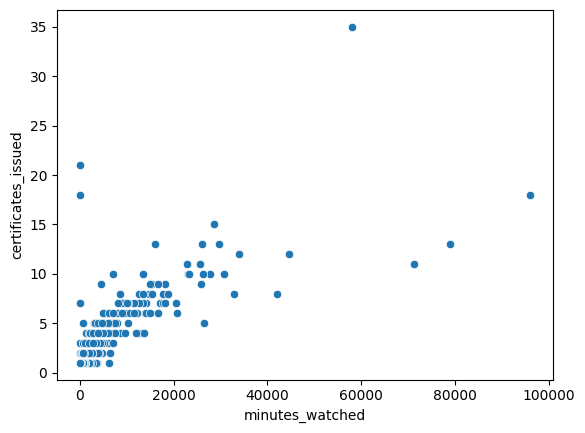

In [5]:
sns.scatterplot(data=df, x='minutes_watched', y='certificates_issued')
plt.show()

### As we can see there is a high correlation between these two variables


# Construct a linear regression using the minutes_watched as a predictor and certificates_issued as a target.

In [6]:
df

,student_id,certificates_issued,minutes_watched
0,6,1,148.12
1,182,7,14132.07
2,801,13,78858.00
3,841,3,4870.90
4,862,1,1145.65
...,...,...,...
653,278882,1,174.78
654,278927,2,767.70
655,279468,1,160.08
656,279738,1,158.07


In [26]:
x_train, x_test, y_train, y_test = (np.reshape(i, (-1, 1)) for i in train_test_split(df['minutes_watched'], df['certificates_issued'], random_state=42, test_size=0.2, train_size=0.8))

In [33]:
model = LinearRegression().fit(X=x_train, y=y_train)

In [34]:
y_predicted = model.predict(x_test)

In [37]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predicted)
    
# Print the results
print("#" * 40)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")
print("#" * 40)

########################################
Mean Absolute Error (MAE): 1.21
Mean Squared Error (MSE): 6.66
Root Mean Squared Error (RMSE): 2.58
R-squared (R2) Score: 0.56
########################################
